<a href="https://colab.research.google.com/github/amanagr6697/Attendance_System/blob/main/Copy_of_Fruit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 																			                                # for manipulating the directories
import cv2 																			                                # for image processing 
import random 																		                              # for shuffling
import numpy as np 																	                            # for array manipulating and scientific computing
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

import tensorflow as tf 															                          
from tensorflow import keras 														                        

from tensorflow.keras.models import Model 								                      
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Flatten, BatchNormalization
from tensorflow.keras.utils import to_categorical				       				          # for categorical labels
from tensorflow.keras import optimizers

In [ ]:
NAME = 'fruits-classifier'                                                      # name for the callback output
base_dir = "datasets/fruits-360/"	                                              # directory path of the fruit dataset, download from: https://github.com/Horea94/Fruit-Images-Dataset (Horea Muresan, Mihai Oltean, Fruit recognition from images using deep learning, Acta Univ. Sapientiae, Informatica Vol. 10, Issue 1, pp. 26-42, 2018.)
CATEGORIES = ["Tomato","Apple","Banana"]
class_names = CATEGORIES
num_classes = 6
img_size = 100

In [ ]:
!git clone https://github.com/Horea94/Fruit-Images-Dataset.git

!ls

base_dir = 'Fruit-Images-Dataset/'

!ls Fruit-Images-Dataset/

fatal: destination path 'Fruit-Images-Dataset' already exists and is not an empty directory.
Fruit-Images-Dataset  sample_data
LICENSE  papers  readme.md  src  Test  test-multiple_fruits  Training


In [ ]:
!ls Fruit-Images-Dataset/Training/

'Apple Braeburn'       'Grape Blue'	     'Pear Monster'
'Apple Crimson Snow'   'Grapefruit Pink'     'Pear Red'
'Apple Golden 1'       'Grapefruit White'    'Pear Stone'
'Apple Golden 2'       'Grape Pink'	     'Pear Williams'
'Apple Golden 3'       'Grape White'	      Pepino
'Apple Granny Smith'   'Grape White 2'	     'Pepper Green'
'Apple Pink Lady'      'Grape White 3'	     'Pepper Orange'
'Apple Red 1'	       'Grape White 4'	     'Pepper Red'
'Apple Red 2'	        Guava		     'Pepper Yellow'
'Apple Red 3'	        Hazelnut	      Physalis
'Apple Red Delicious'   Huckleberry	     'Physalis with Husk'
'Apple Red Yellow 1'    Kaki		      Pineapple
'Apple Red Yellow 2'    Kiwi		     'Pineapple Mini'
 Apricot	        Kohlrabi	     'Pitahaya Red'
 Avocado	        Kumquats	      Plum
'Avocado ripe'	        Lemon		     'Plum 2'
 Banana		       'Lemon Meyer'	     'Plum 3'
'Banana Lady Finger'    Limes		      Pomegranate
'Banana Red'	        Lychee		     'Pomelo Sweetie'
 Beetroot	        Mand

In [ ]:
# Read training set
train_images = []
train_dir = os.path.join(base_dir, 'Training/')										              # set the training directory in the path

for category in CATEGORIES:															                        # iterate to each category
    path = os.path.join(train_dir, category)
    class_num = CATEGORIES.index(category)
    for image in os.listdir(path):													                    # iterate to each image in the category
        if(image.endswith('jpg') and not image.startswith('.')):
            img_array = cv2.imread(os.path.join(path,image),                    # read the image
                              cv2.IMREAD_GRAYSCALE)	
            train_images.append([img_array, class_num])								          # save the image in training data array

print("Training images: ", len(train_images))

Training images:  3074


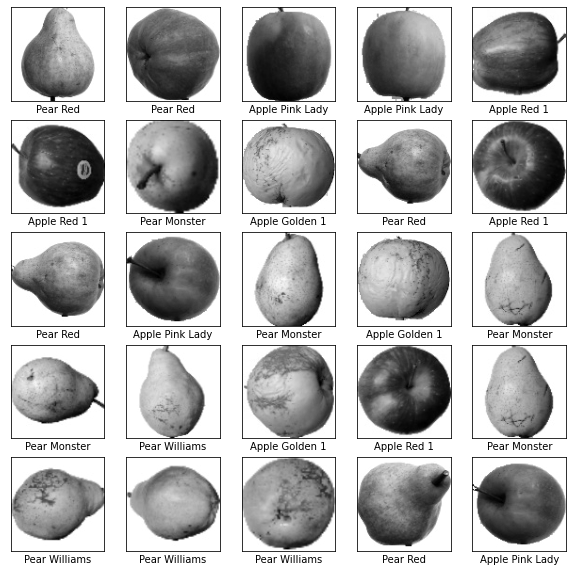

In [ ]:
import random
img_idx = random.sample(range(len(train_images)), 25)
img_idx = np.array(img_idx)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[img_idx[i]][0], cmap='gray')
    plt.xlabel(class_names[train_images[img_idx[i]][1]])
plt.show()

In [ ]:
# Read testing set
test_images = []
test_dir = os.path.join(base_dir, 'Test/')											                # set the test directory in the path

for category in CATEGORIES:															                        # iterate to each category
    path = os.path.join(test_dir, category)
    class_num = CATEGORIES.index(category)
    for image in os.listdir(path):													                    # iterate to each image in the category
        if(image.endswith('jpg') and not image.startswith('.')):													
            img_array = cv2.imread(os.path.join(path,image),                    # read the image
                                   cv2.IMREAD_GRAYSCALE)	
            test_images.append([img_array, class_num])								          # save the image in test data array
            
print("Testing images: ", len(test_images))

Testing images:  1030


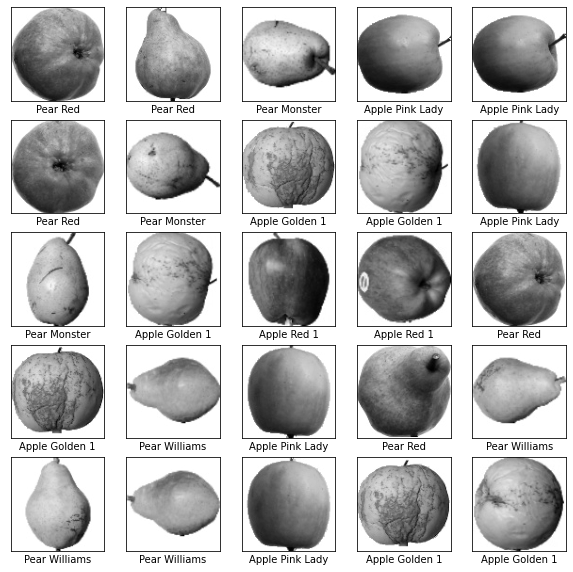

In [ ]:
import random
img_idx = random.sample(range(len(test_images)), 25)
img_idx = np.array(img_idx)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[img_idx[i]][0], cmap='gray')
    plt.xlabel(class_names[test_images[img_idx[i]][1]])
plt.show()

In [ ]:
# Shuffle the dataset before training for better accuracy
x_train = []																		                                # array for images
y_train = []																		                                # array for labels

random.shuffle(train_images)														                        # shuffle training images

for features, label in train_images: 												                    # iterate to each image and the corresponding label in training data
	x_train.append(features)
	y_train.append(label)
x_train = np.array(x_train)
 
x_test = []																			                                # array for images
y_test = []																			                                # array for labels

random.shuffle(test_images) 														                        # shuffle testing images

for features, label in test_images: 												                    # iterate to each image and the corresponding label in training data
	x_test.append(features)
	y_test.append(label)
x_test = np.array(x_test)

In [ ]:
# reshape and normalize the data before training
x_train = x_train.reshape(-1, img_size, img_size, 1)
mean_train = np.mean(x_train, axis=0)
x_train = x_train-mean_train
x_train = x_train/255

x_test = x_test.reshape(-1, img_size, img_size, 1)
mean_test = np.mean(x_test, axis=0)
x_test = x_test-mean_test
x_test = x_test/255

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

print(x_train.shape)
print(x_test.shape)

(3074, 100, 100, 1)
(1030, 100, 100, 1)


In [ ]:
# Hyperparameters settings
input_shape = x_train.shape[1:]
filters_numbers = [16, 32, 64]
filters_size = [[5,5],[4,4],[3,3]]

pool_size=(2, 2)
weight_decay = 5e-4
dropout = 0.6
lr = 0.001
momentum = 0.9

epochs = 10
batch_size = 32

L2_norm = keras.regularizers.l2(weight_decay)

In [ ]:
# Setup model layers

# Input layer
model_input = Input(shape=input_shape)

# 1st Convolutional layer
model_output = Conv2D(filters_numbers[0], kernel_size=(filters_size[0]), kernel_regularizer=L2_norm, padding="Same", 
							activation='relu', data_format='channels_last')(model_input)

model_output = BatchNormalization()(model_output)

model_output = MaxPooling2D(pool_size=(pool_size))(model_output)

# 2nd Convolutional layer
model_output = Conv2D(filters_numbers[1], kernel_size=(filters_size[1]), kernel_regularizer=L2_norm, padding="Same",  
							activation='relu', data_format='channels_last')(model_output)

model_output = BatchNormalization()(model_output)

model_output = MaxPooling2D(pool_size=(pool_size))(model_output)

# 3rd Convolutional layer
model_output = Conv2D(filters_numbers[2], kernel_size=(filters_size[2]), kernel_regularizer=L2_norm, padding="Same",  
							activation='relu', data_format='channels_last')(model_output)

model_output = BatchNormalization()(model_output)

model_ouput = GlobalAveragePooling2D(data_format='channels_last')(model_output)

# Convert features to flatten vector      
model_output = Flatten()(model_output)

# Full-connected layer
model_output = Dense(512)(model_output)
model_output = Dropout(dropout)(model_output)

# Output layer
model_output = Dense(num_classes, activation='softmax', name='id')(model_output)

# Create the Model by using Input and Output layers
model = Model(inputs=model_input, outputs=model_output, name=NAME)

# Show the Model summary information
model.summary()

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=optimizers.SGD(lr, momentum), metrics=['accuracy'])

Model: "fruits-classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 16)      416       
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        8224      
                                                                 
 batch_normalization_1 (Batc  (None, 50, 50, 32) 

In [ ]:
# Train the model
print("[INFO] Train the model on training data")

history = model.fit(x=x_train, y=np.asarray(y_train), batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)

[INFO] Train the model on training data
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


87/87 [==============================] - 71s 804ms/step - loss: 0.3682 - accuracy: 0.9422 - val_loss: 4.2339 - val_accuracy: 0.1786
Epoch 2/10
87/87 [==============================] - 60s 691ms/step - loss: 0.0884 - accuracy: 0.9913 - val_loss: 6.2730 - val_accuracy: 0.3409
Epoch 3/10
87/87 [==============================] - 59s 684ms/step - loss: 0.0494 - accuracy: 0.9953 - val_loss: 6.9039 - val_accuracy: 0.3214
Epoch 4/10
87/87 [==============================] - 60s 687ms/step - loss: 0.0521 - accuracy: 0.9953 - val_loss: 6.9135 - val_accuracy: 0.5617
Epoch 5/10
87/87 [==============================] - 60s 691ms/step - loss: 0.0435 - accuracy: 0.9978 - val_loss: 4.3918 - val_accuracy: 0.7500
Epoch 6/10
87/87 [==============================] - 59s 682ms/step - loss: 0.0342 - accuracy: 0.9996 - val_loss: 0.4189 - val_accuracy: 0.9091
Epoch 7/10
87/87 [==============================] - 59s 680ms/step - loss: 0.0337 - accuracy: 1.0000 - val_loss: 0.0347 - val_accuracy: 1.0000
Epoch 8/10

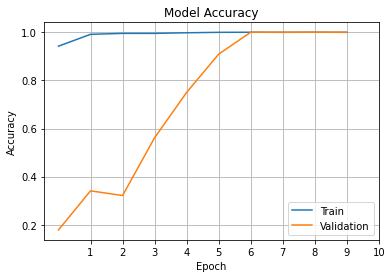

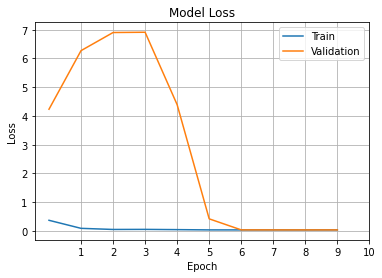

In [ ]:
# Plot training curves
x = [1,2,3,4,5,6,7,8,9,10]
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(x)
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid(b=None, which='major', axis='both')
plt.savefig('fruits_classifier-training_acc.png')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(x)
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(b=None, which='major', axis='both')

plt.savefig('fruits_classifier-training_loss.png')
plt.show()

In [ ]:
# Test the model
print("[INFO] Evaluate the test data")

results = model.evaluate(x=x_test, y=y_test, batch_size=batch_size, verbose=1)
print('Testing Loss, Testing Acc: ', [round(r,4) for r in results])

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

print('Accuracy', round(accuracy_score(y_test, y_pred),4))
print('Classification report', classification_report(y_test, y_pred, target_names=class_names))

[INFO] Evaluate the test data
33/33 [==============================] - 5s 156ms/step - loss: 0.2229 - accuracy: 0.9718
Testing Loss, Testing Acc:  [0.2229, 0.9718]
33/33 [==============================] - 5s 151ms/step
Accuracy 0.9718
Classification report                  precision    recall  f1-score   support

 Apple Golden 1       1.00      0.93      0.96       160
Apple Pink Lady       1.00      0.91      0.95       152
    Apple Red 1       0.98      1.00      0.99       164
       Pear Red       0.94      0.99      0.96       222
  Pear Williams       1.00      0.99      1.00       166
   Pear Monster       0.93      1.00      0.97       166

       accuracy                           0.97      1030
      macro avg       0.98      0.97      0.97      1030
   weighted avg       0.97      0.97      0.97      1030



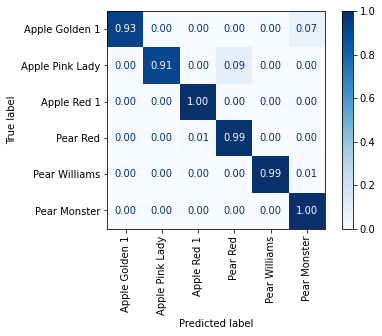

In [ ]:
# Plot Testing confusion matrix
cmat = confusion_matrix(np.asarray(y_test), y_pred, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation='vertical', values_format='.2f')
plt.show()


In [ ]:
KERAS_MODEL_NAME = "fruits.h5"

In [ ]:
model.save(KERAS_MODEL_NAME)

In [ ]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [ ]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size


In [ ]:
convert_bytes(get_file_size(KERAS_MODEL_NAME), "MB")

File size: 156.562 Megabytes


In [ ]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"


In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()


tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

File size: 80124.457 Kilobytes
